# Project Statement

The Film Junky Union, a new edgy community for classic movie enthusiasts, is developing a system for filtering and categorizing movie reviews. The goal is to train a model to automatically detect negative reviews. You'll be using a dataset of IMBD movie reviews with polarity labelling to build a model for classifying positive and negative reviews. It will need to have an F1 score of at least 0.85.

# Introduction

### Overview
The core objective of this project is to  evaluate and compare a spectrum of machine learning and deep learning models on their ability to conduct sentiment analysis on a collection of movie and product reviews. By categorizing sentiments into positive, negative, or neutral classes, the project aims to pinpoint the models that most accurately reflect the nuanced sentiments expressed in textual data.

Project Objectives
- To compare traditional machine learning models (such as Linear SVM, Logistic Regression, and LightGBM) with advanced deep learning techniques (like those using BERT embeddings) in the context of sentiment analysis.
- To assess the effectiveness of different feature extraction techniques, including TF-IDF vectorization and BERT embeddings, in capturing the semantic richness of text for sentiment analysis.
- To identify the strengths and weaknesses of each model, thereby guiding the selection of the most appropriate sentiment analysis techniques for specific types of textual data and application domains.

Methodological Process
- Data Preparation: The initial step involves collecting and preprocessing textual data (movie and product reviews) to create a standardized dataset suitable for model training and evaluation.
- Feature Extraction: This phase applies TF-IDF vectorization to transform text into numerical features for traditional models and employs BERT embeddings for deep learning models, aiming to capture the semantic essence of the text.
- Model Training and Evaluation: Multiple machine learning and deep learning models are trained on the processed data. Their performance is evaluated using metrics such as accuracy, precision, recall, and F1-score to gauge their effectiveness in sentiment analysis.
- Comparison and Analysis: The results from different models are compared to analyze their performance in understanding and categorizing sentiments. This comparison sheds light on how various modeling approaches handle the intricacies of human language and emotion.

By undertaking this comprehensive approach, the project seeks to advance the understanding of sentiment analysis methodologies and their practical applications, ultimately contributing to more effective and nuanced analysis of human sentiments in textual data.

## Initialization

In [5]:
import math
import numpy as np
import pandas as pd
import re
import spacy
import torch
import transformers
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import nltk
import sklearn.metrics as metrics
from sklearn.dummy import DummyClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from tqdm import tqdm
from lightgbm import LGBMClassifier
from transformers import BertTokenizer, BertModel, BertConfig

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn-v0_8')

In [7]:
# this is to use progress_apply, read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Load Data

In [8]:
try:
    df_reviews = pd.read_csv('./datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})
except:
    df_reviews = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [9]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [10]:
df_reviews.sample(10)

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
39531,tt0044876,movie,The Man in the White Suit,The Man in the White Suit,1951,\N,85,0,"Comedy,Drama,Sci-Fi",7.3,8586,"Contains *spoilers* - also, my quotes may not ...",10,pos,1,train,9421
41310,tt0107617,movie,The Scent of Green Papaya,Mùi du du xanh,1993,\N,104,0,"Drama,Music,Romance",7.3,7637,"The video case for this film reads ""a story of...",4,neg,0,test,6889
1700,tt0831840,movie,Ahista Ahista,Ahista Ahista,2006,\N,122,0,"Drama,Romance",7.0,1380,"This movie was disaster at Box Office, and the...",9,pos,1,train,1712
22591,tt0365513,movie,Monster Man,Monster Man,2003,\N,95,0,"Adventure,Comedy,Horror",5.7,4350,Some of the greatest and most loved horror mov...,4,neg,0,test,3391
28635,tt0306646,movie,Ringing Bell,Chirin no suzu,1978,\N,47,0,"Animation,Drama,Family",7.1,566,in a not so conventional sense of the word. Th...,10,pos,1,train,8477
19737,tt0071003,tvSeries,Kolchak: The Night Stalker,Kolchak: The Night Stalker,1974,1975,51,0,"Horror,Mystery,Thriller",8.5,3947,It's a genuine shame that this spin-off TV ser...,8,pos,1,train,11509
21887,tt0037062,movie,Meet the People,Meet the People,1944,\N,100,0,"Comedy,Musical,Romance",5.8,344,I went into this movie hoping for the best. I ...,2,neg,0,train,6567
23939,tt0151738,movie,Never Been Kissed,Never Been Kissed,1999,\N,107,0,"Comedy,Drama,Romance",6.1,81105,"Very sadly, I can relate to this movie, as I'm...",7,pos,1,test,7617
26714,tt0053182,movie,Porgy and Bess,Porgy and Bess,1959,\N,138,0,"Drama,Musical,Romance",7.1,1465,This movie is one of the only historical docum...,10,pos,1,test,7686
32144,tt0166813,movie,Spirit: Stallion of the Cimarron,Spirit: Stallion of the Cimarron,2002,\N,83,0,"Adventure,Animation,Drama",7.1,62774,"This is one of the most calming, relaxing, and...",9,pos,1,train,11838


In [11]:
# Check for missing values in each column of the DataFrame
missing_values = df_reviews.isnull().sum()

# Print the counts of missing values
print(missing_values)

# # Drop the 'average_rating' and 'votes' columns from the DataFrame
# df_reviews = df_reviews.drop(columns=['average_rating', 'votes'])

# # Display the updated DataFrame to confirm the columns are dropped
# print(df_reviews.info())

tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     2
votes              2
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64


For the purpose of sentiment analysis focused on classifying movie reviews as positive or negative, the columns **average_rating** and **votes** are not directly relevant. The primary interest lies in the textual content of the reviews (**review** column) and their associated sentiment labels (**pos** column). The **average_rating** and **votes** columns relate more to the overall audience reception of a film, which, while interesting for other types of analysis (e.g., correlating audience reception with sentiment of reviews), do not contribute to the task of sentiment classification based on the review text itself.

In [12]:
# Get simple counts for the 'pos' column (sentiment)
print("Distribution of Sentiments:")
print("Positive = 1; Negative = 0")
print(df_reviews['pos'].value_counts())
print("\n")

# Get simple counts for the 'ds_part' column (dataset partition)
print("Distribution of Dataset Partitions (Train/Test):")
print(df_reviews['ds_part'].value_counts())
print("\n")

# Since 'title_type' and 'genres' can have multiple categories, and 'genres' can be a combination,
# it's useful to explore them for insights but keeping in mind the complexity of 'genres'.
print("Distribution of Title Types:")
print(df_reviews['title_type'].value_counts())
print("\n")

# For 'genres', consider the unique combinations or perhaps the top N if there are many unique combinations.
print("Distribution of Genres (Top 10):")
print(df_reviews['genres'].value_counts().head(10))
print("\n")

# Get simple counts for the 'is_adult' column
print("Distribution of Adult Classification:")
print(df_reviews['is_adult'].value_counts())

Distribution of Sentiments:
Positive = 1; Negative = 0
pos
0    23715
1    23616
Name: count, dtype: int64


Distribution of Dataset Partitions (Train/Test):
ds_part
train    23796
test     23535
Name: count, dtype: int64


Distribution of Title Types:
title_type
movie           36861
tvMovie          2892
video            2742
tvSeries         2246
short             887
tvMiniSeries      713
tvEpisode         635
tvSpecial         183
videoGame         154
tvShort            18
Name: count, dtype: int64


Distribution of Genres (Top 10):
genres
Drama                   3392
Comedy                  2160
Drama,Romance           1808
Horror                  1725
Comedy,Romance          1304
Comedy,Drama,Romance    1212
Comedy,Drama            1181
Action,Crime,Drama       914
Horror,Thriller          890
Crime,Drama              648
Name: count, dtype: int64


Distribution of Adult Classification:
is_adult
0    47249
1       82
Name: count, dtype: int64


Looking at distributions across different dimensions of a dataset is fundamental in understanding its structure, potential biases, and areas that may require special attention during data preprocessing and model training. Here's what we can conclude from the distributions provided:
- The dataset is almost perfectly balanced between positive and negative reviews (23715 negative, 23616 positive). This balance is beneficial for training sentiment analysis models, as it reduces the risk of a model being biased towards predicting one sentiment over the other. No special balancing techniques (e.g., oversampling, undersampling) are necessary based on this distribution.
- The train and test datasets are also nearly balanced (23796 in train, 23535 in test), indicating that the split was done thoughtfully to ensure both datasets are representative of the overall data.
- The majority of reviews are for movies, with significantly fewer reviews for other types like tvMovie, video, and tvSeries. This indicates that any sentiment analysis model trained on this dataset might perform best on movie reviews and potentially less accurately on other media types due to the lower representation in the training data.
- The genre distribution shows a variety of genres with Drama being the most common, followed by Comedy and specific combinations like Drama,Romance and Horror. This diversity is good for building a model that can understand sentiments across different genres. However, the model might be more accurate for genres with more data (like Drama and Comedy) and less accurate for less represented genres.
- The vast majority of reviews are for non-adult content (47249 non-adult vs. 82 adult). This extreme imbalance suggests that any sentiment analysis model developed might not perform well on adult content due to the lack of training data in this category.

In [13]:
df_reviews.duplicated().sum()

0

The dataset has no duplicates meaning each entry is unique, which helps in training a model without the concern of overfitting to repeating entries.

With the dataset checked for missing values, duplicates, and having gained an understanding of its distribution across various dimensions, we are prepared to move on to the next step.

## EDA

Let's check the number of movies and reviews over years.

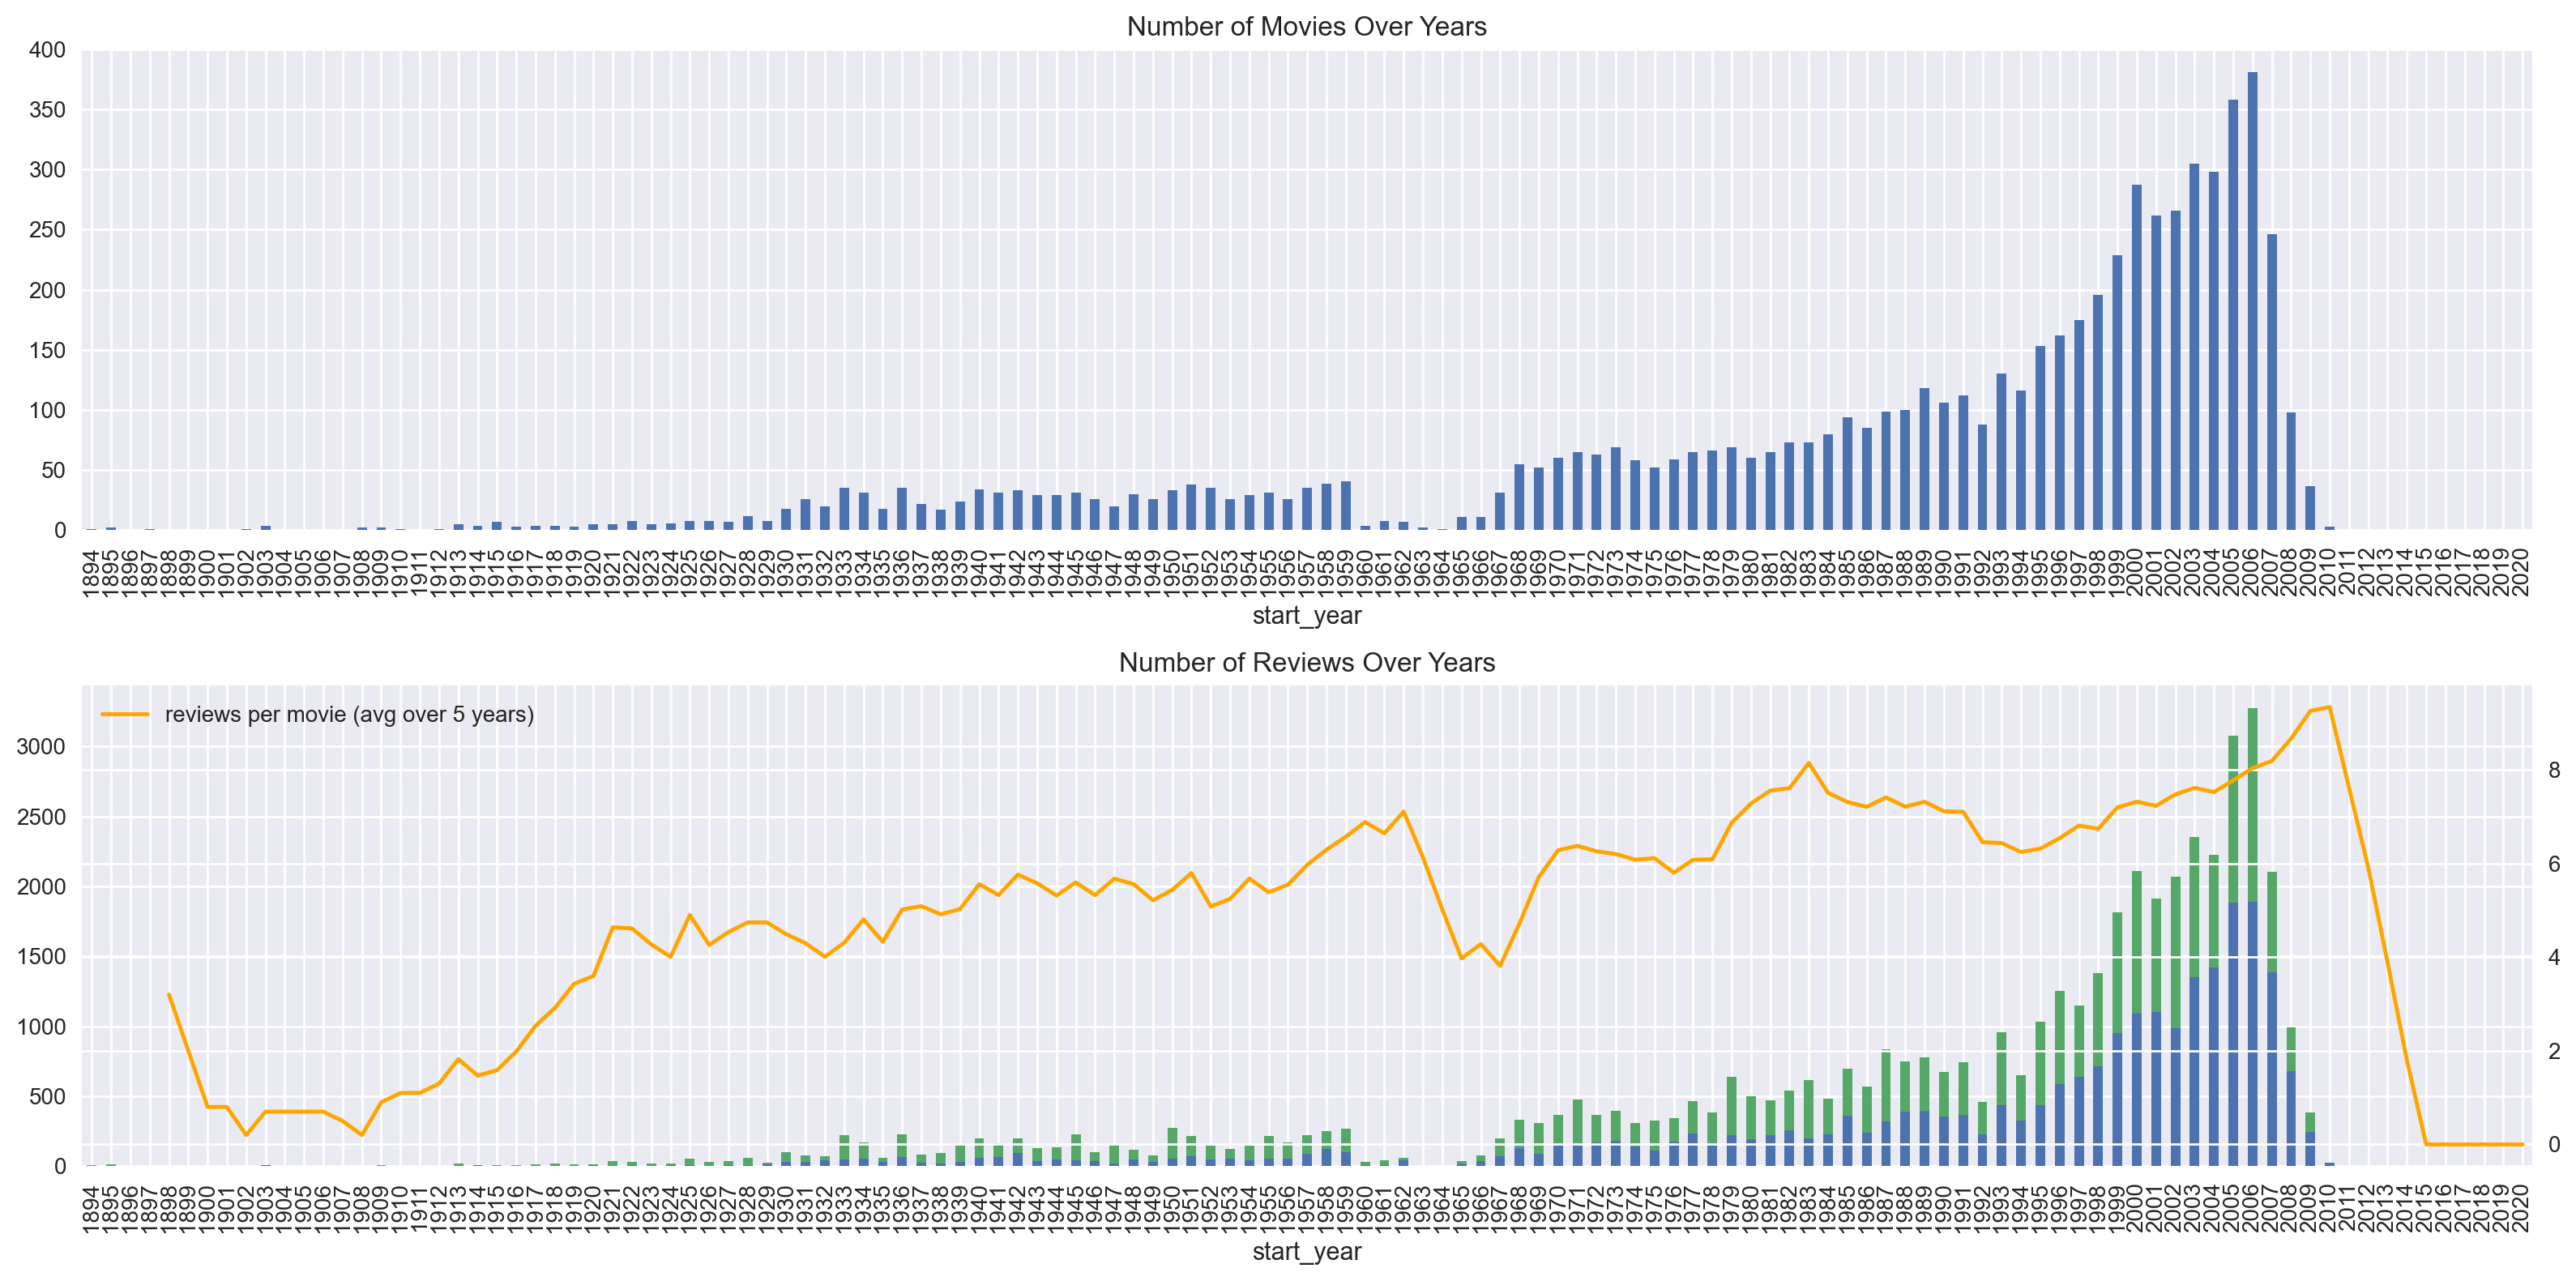

In [14]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over Years')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Number of Reviews Over Years')

fig.tight_layout()

In [15]:
# Adjust the range to the last 10 years ending in 2010
last_10_years = np.arange(2001, 2011)

# 1. Overall trend in the number of movies over the last 10 years ending in 2010
movies_last_10_years = dft1.loc[last_10_years]
movie_count_trend_last_10_years = movies_last_10_years.mean()

# 2. Year with the maximum number of movies in the last 10 years ending in 2010
year_max_movies_last_10_years = movies_last_10_years.idxmax()

# 3. Overall trend in the number of reviews over the last 10 years ending in 2010
reviews_last_10_years = dft2.loc[last_10_years]
review_count_trend_last_10_years = reviews_last_10_years.mean()

# 4. Year with the maximum number of reviews in the last 10 years ending in 2010
year_max_reviews_last_10_years = reviews_last_10_years.idxmax()

# 5. Average number of reviews per movie over the last 5 years ending in 2010
# Adjust the range to the last 5 years ending in 2010
last_5_years = np.arange(2006, 2011)
reviews_per_movie_last_5_years = dft3.loc[last_5_years]
avg_reviews_per_movie_last_5_years = reviews_per_movie_last_5_years.mean()

# Printing the key data points
print(f"Overall trend in the number of movies over the last 10 years ending in 2010: {movie_count_trend_last_10_years}")
print(f"Year with the maximum number of movies in the last 10 years ending in 2010: {year_max_movies_last_10_years}")
print(f"Overall trend in the number of reviews over the last 10 years ending in 2010: {review_count_trend_last_10_years}")
print(f"Year with the maximum number of reviews in the last 10 years ending in 2010: {year_max_reviews_last_10_years}")
print(f"Average number of reviews per movie over the last 5 years ending in 2010: {avg_reviews_per_movie_last_5_years}")

Overall trend in the number of movies over the last 10 years ending in 2010: 225.4
Year with the maximum number of movies in the last 10 years ending in 2010: 2006
Overall trend in the number of reviews over the last 10 years ending in 2010: 1842.7
Year with the maximum number of reviews in the last 10 years ending in 2010: 2006
Average number of reviews per movie over the last 5 years ending in 2010: 9.340290693016419


On average, there were 225.4 movies per year over the last 10 years ending in 2010. The year 2006 had the highest number of movies compared to other years in that decade. Similar to the number of movies, 2006 also had the highest number of reviews. There was an average of 1842.7 reviews per year in the last decade leading up to 2010.  In the last 5 years ending in 2010, there was an average of approximately 9.34 reviews per movie.

Let's check the distribution of number of reviews per movie with the exact counting and KDE (just to learn how it may differ from the exact counting)

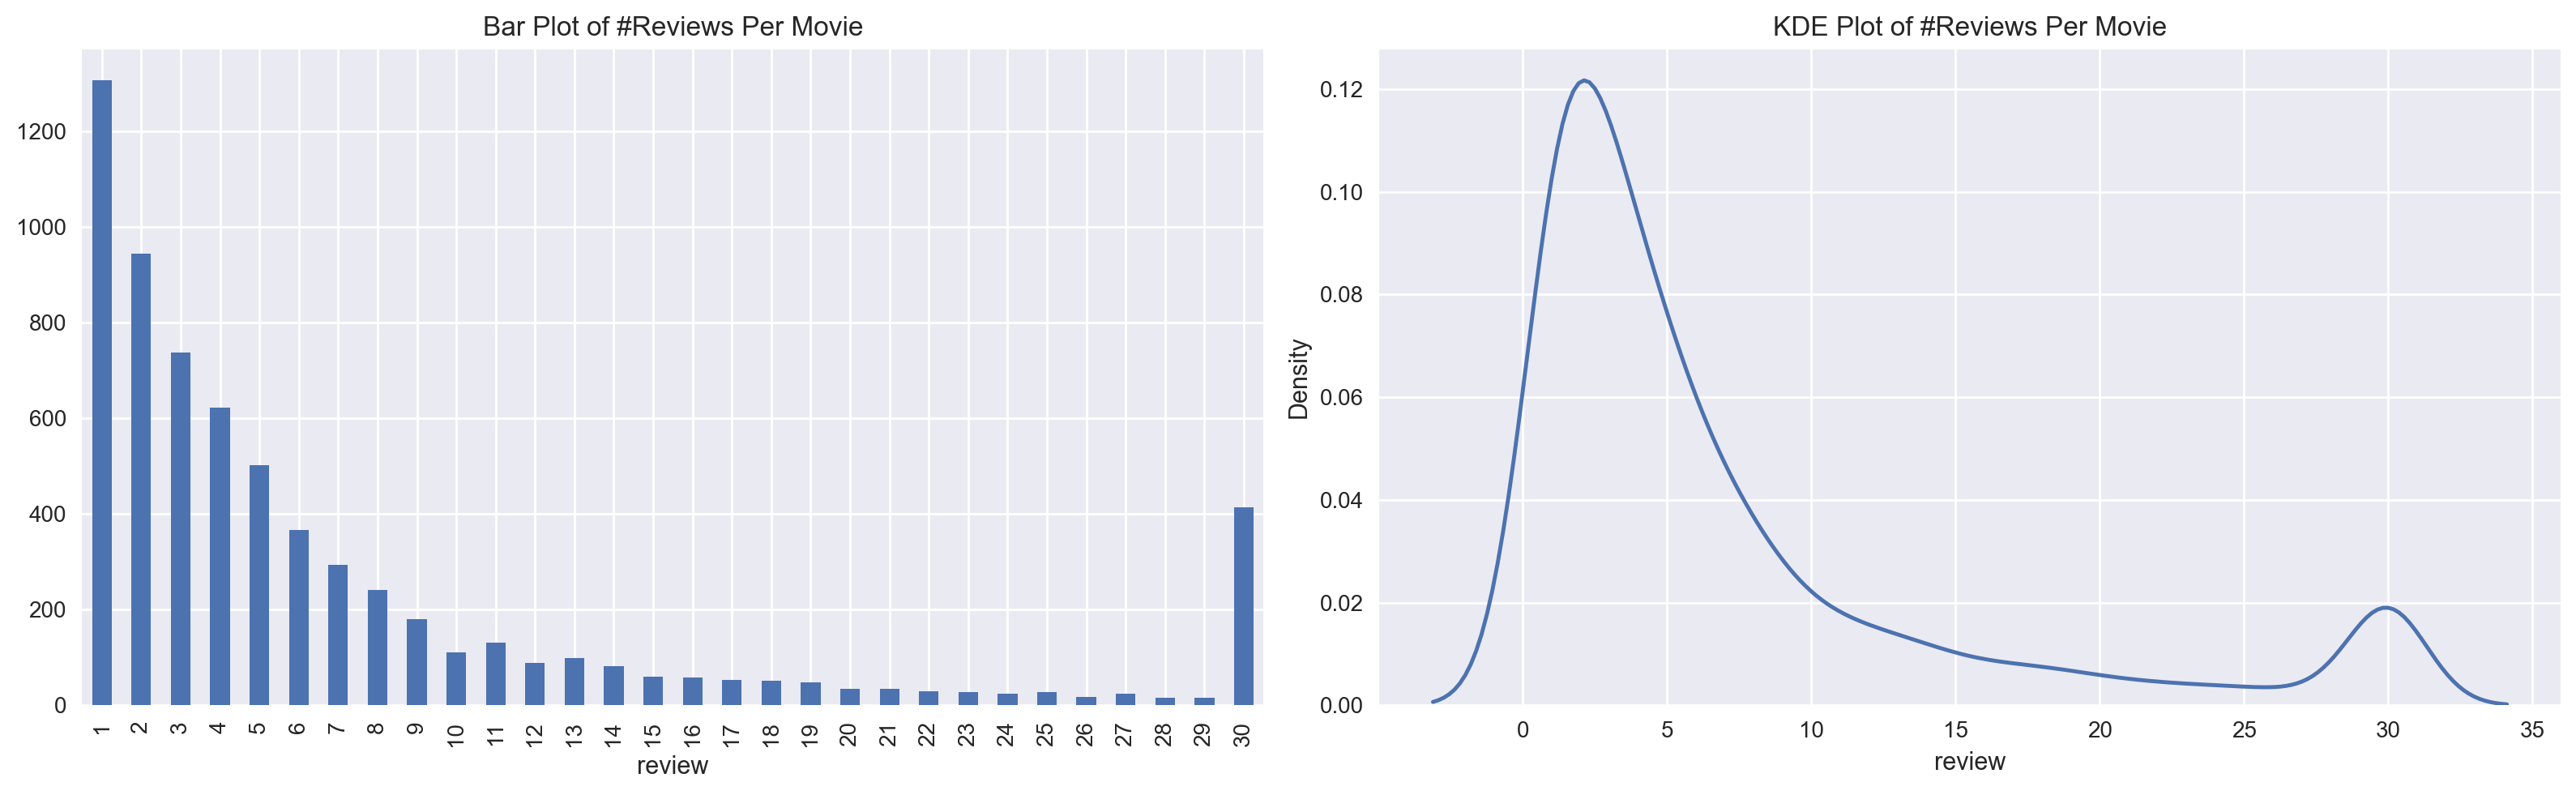

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Bar Plot of #Reviews Per Movie')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('KDE Plot of #Reviews Per Movie')

fig.tight_layout()

Both plots indicate the data is right-skewed, meaning there are a few movies with many reviews and many movies with few reviews. They also peak at 1 review. The majority of movies have only a handful of reviews, which might represent the general trend for most films, while a few movies (blockbusters or critically acclaimed films) receive a substantial amount of attention. The spike in the bar graph for movies with 30 or more reviews could be indicative of outliers.

In [17]:
df_reviews['pos'].value_counts()

pos
0    23715
1    23616
Name: count, dtype: int64

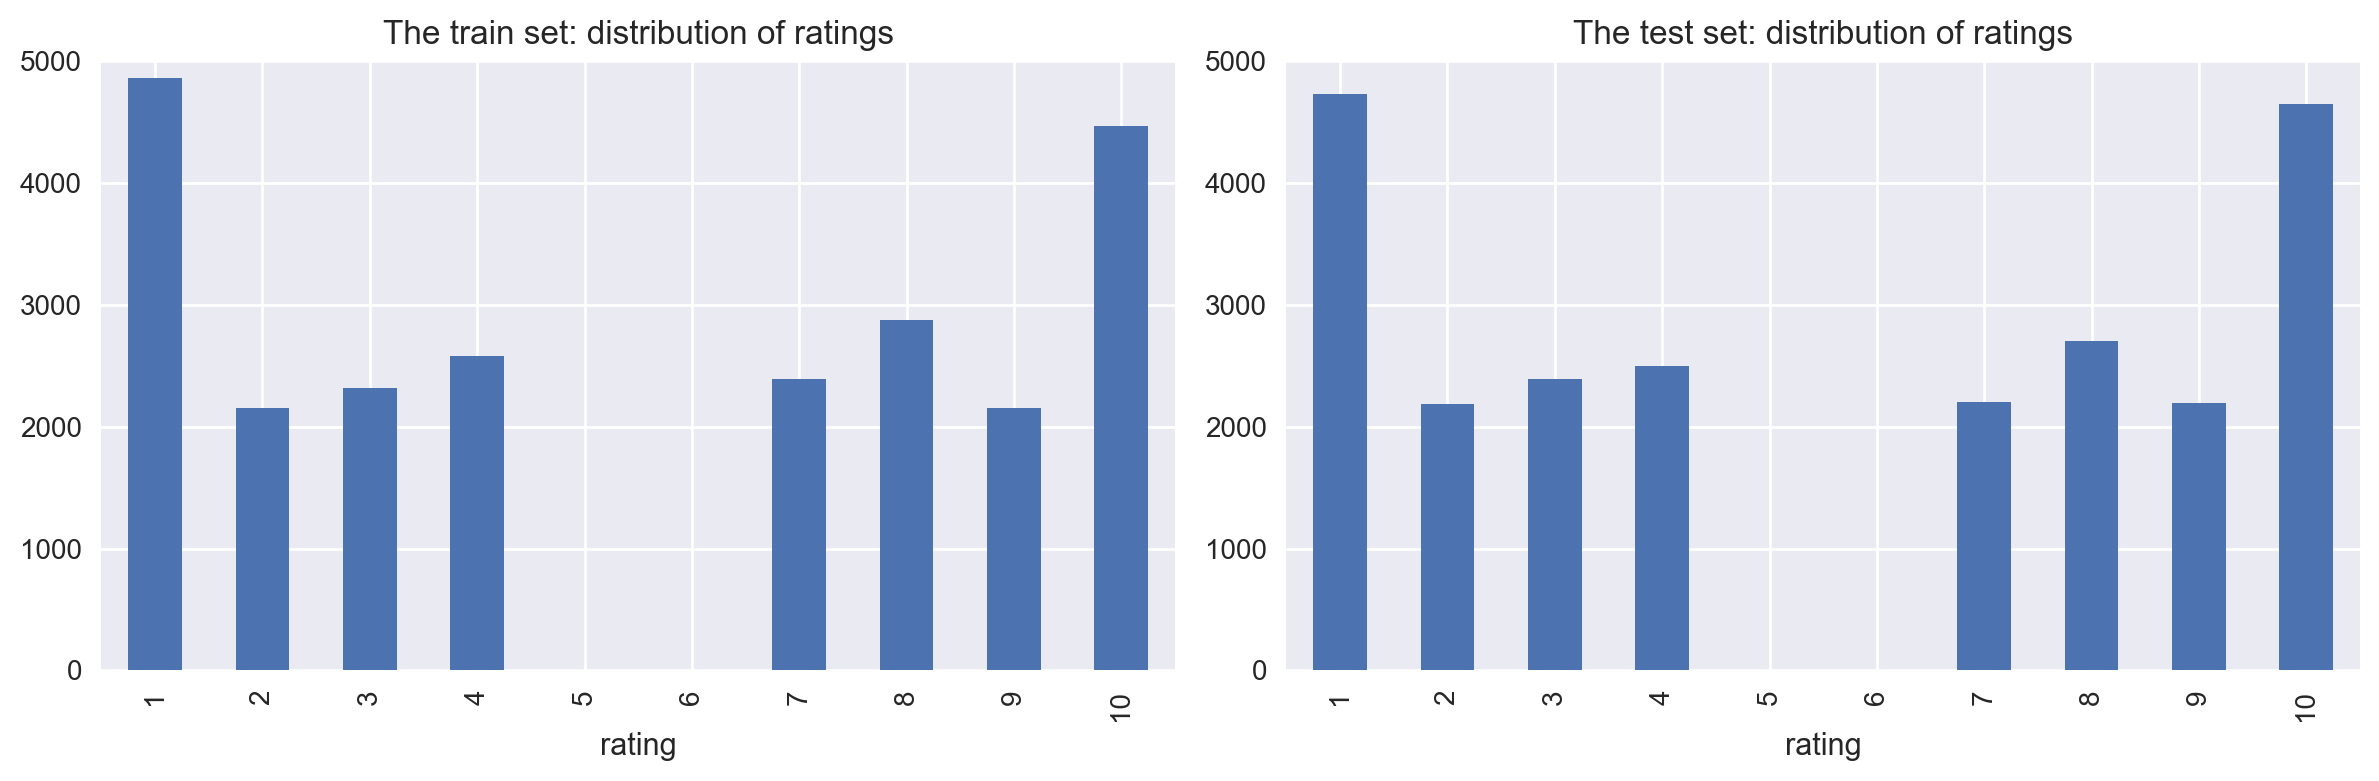

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The train set: distribution of ratings')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The test set: distribution of ratings')

fig.tight_layout()

 The histograms show the frequency of each rating value in both the train and test datasets. Both the train and test sets show a similar pattern of distribution. The distribution pattern between the train and test sets is quite consistent, suggesting that the split between training and testing data has been done properly, maintaining a similar distribution of ratings. 

Distribution of negative and positive reviews over the years for two parts of the dataset

C:\Users\cosmi\AppData\Local\Temp\ipykernel_3212\2564148758.py:14: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
C:\Users\cosmi\AppData\Local\Temp\ipykernel_3212\2564148758.py:15: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
C:\Users\cosmi\AppData\Local\Temp\ipykernel_3212\2564148758.py:30: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
C:\Users\cosmi\AppData\Local\Temp\ipykernel_3212\2564148758.py:31: UserWarning: 

Support for alter

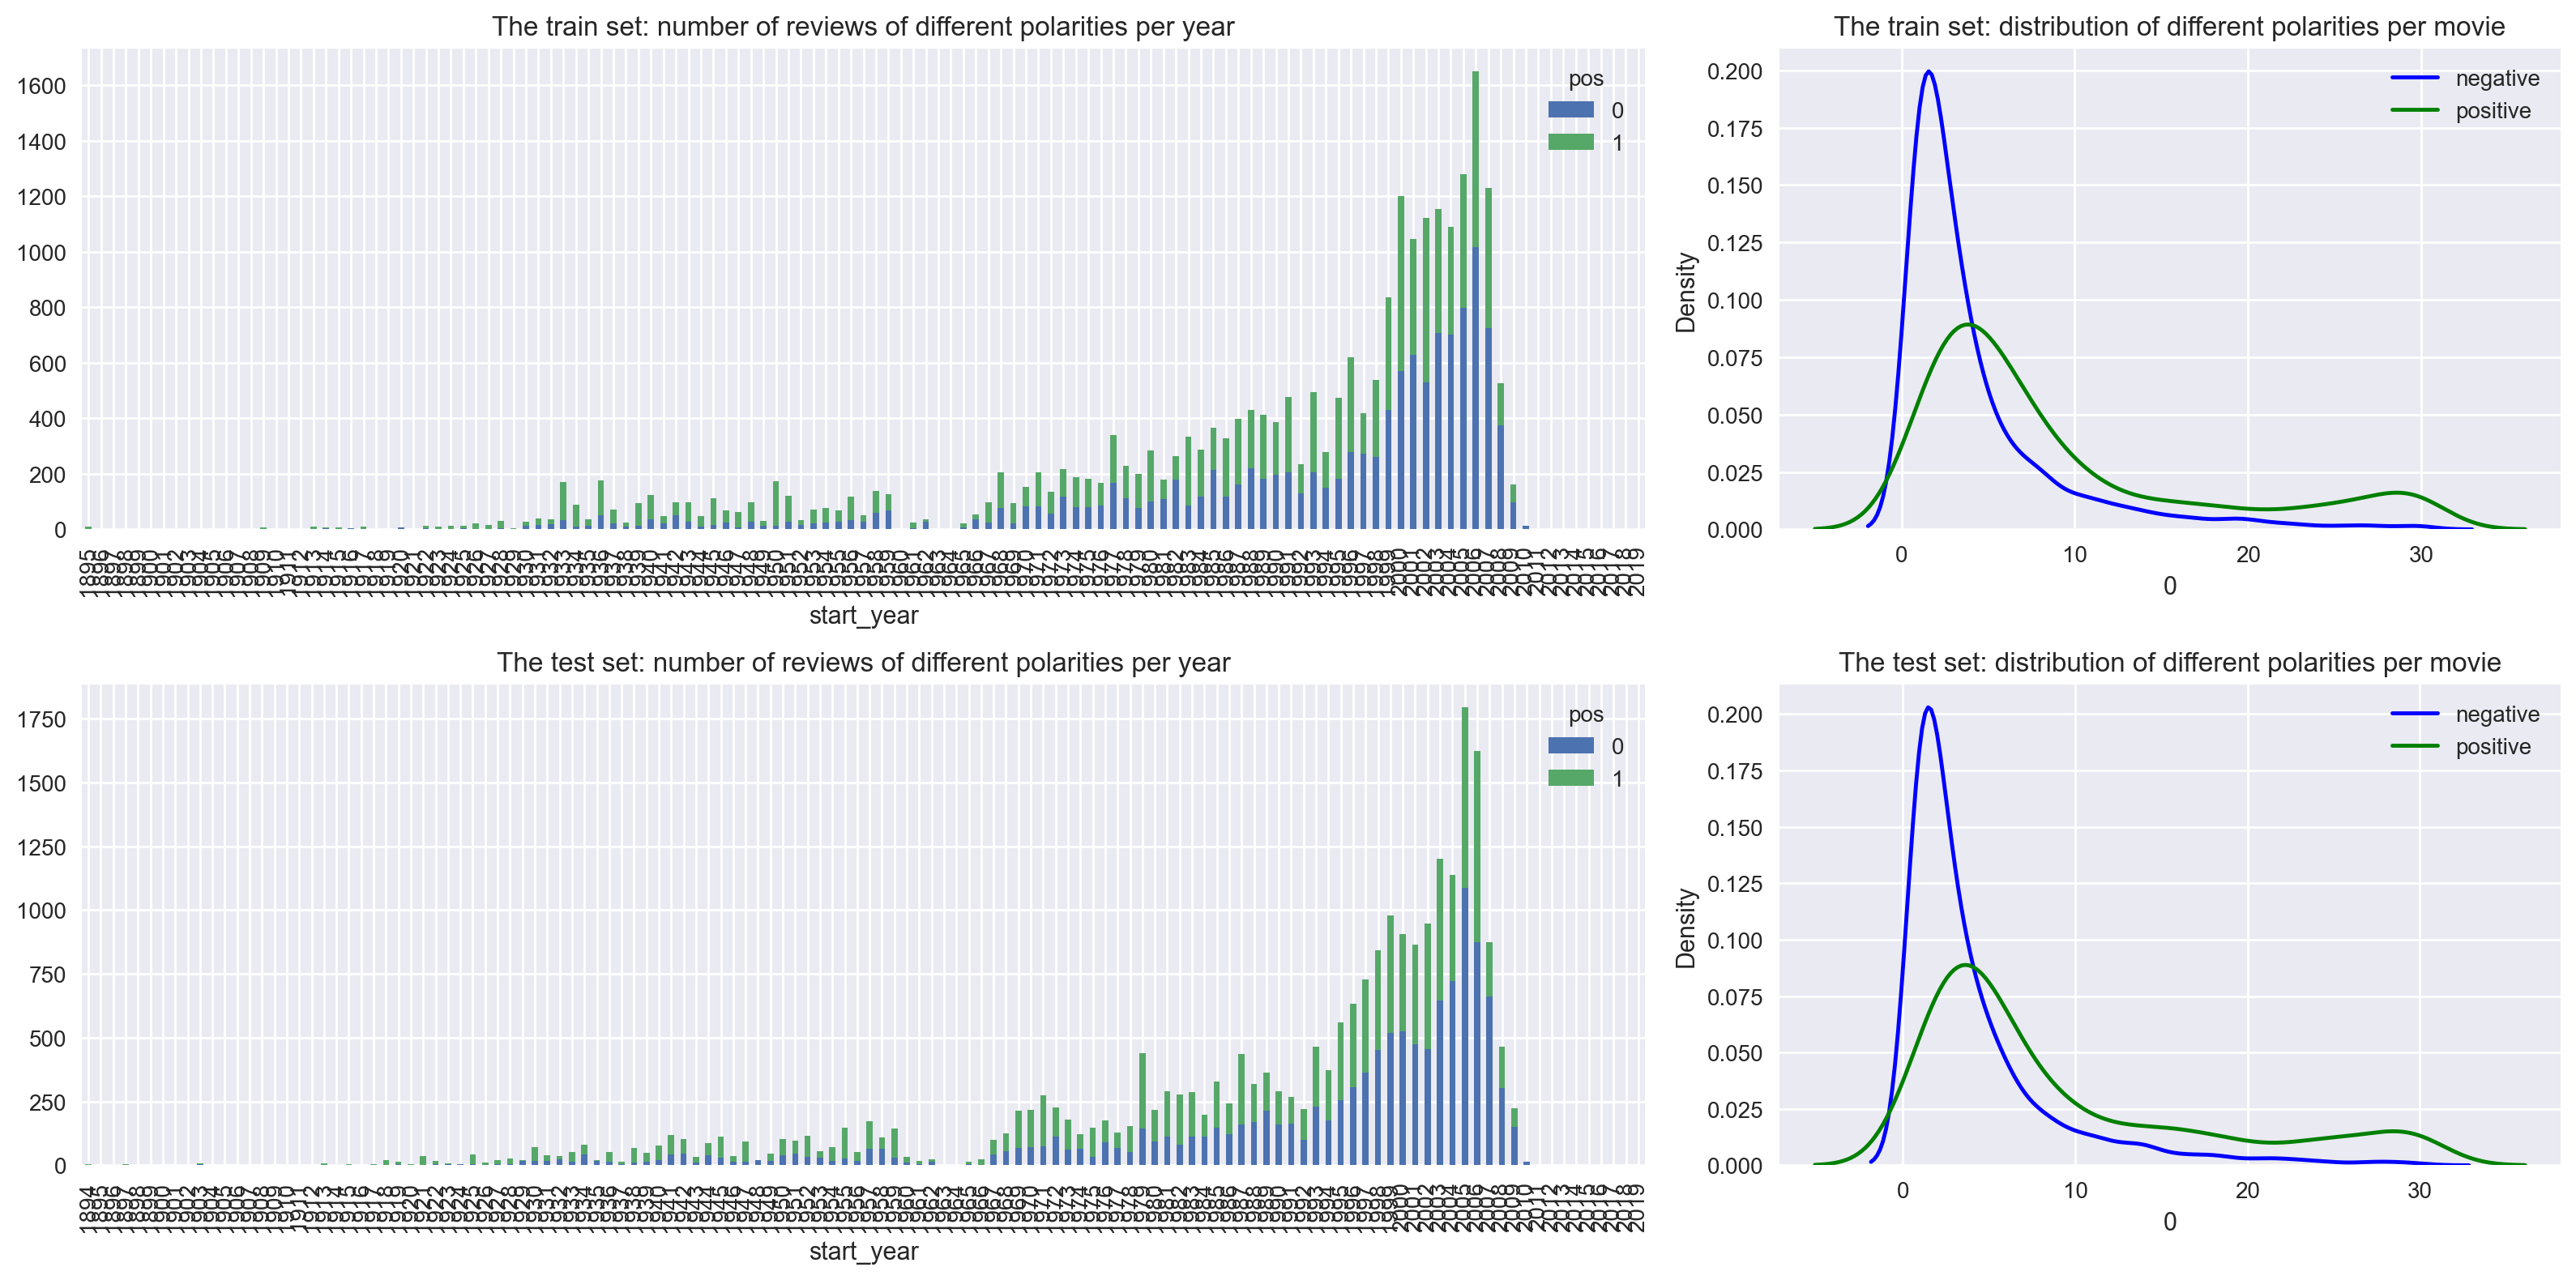

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The train set: number of reviews of different polarities per year')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The train set: distribution of different polarities per movie')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The test set: number of reviews of different polarities per year')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The test set: distribution of different polarities per movie')

fig.tight_layout()

## Evaluation Procedure

Composing an evaluation routine which can be used for all models in this project

In [20]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

## Normalization

We assume all models below accepts texts in lowercase and without any digits, punctuations marks etc.

In [21]:
# Define a function to normalize the text
def normalize_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove punctuation marks
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Apply the normalization function to each review in the dataframe
df_reviews['review_norm'] = df_reviews['review'].apply(normalize_text)

## Train / Test Split

Luckily, the whole dataset is already divided into train/test one parts. The corresponding flag is 'ds_part'.

In [22]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


## Working with models

### Model 0 - Constant

In [23]:
# Create a DummyClassifier object with a strategy to always predict the most frequent class
dummy_model = DummyClassifier(strategy='most_frequent')

# Fit the dummy model on the training data
dummy_model.fit(df_reviews_train['review_norm'], train_target)


DummyClassifier(strategy='most_frequent')

          train  test
Accuracy    0.5   0.5
F1          0.0   0.0
APS         0.5   0.5
ROC AUC     0.5   0.5


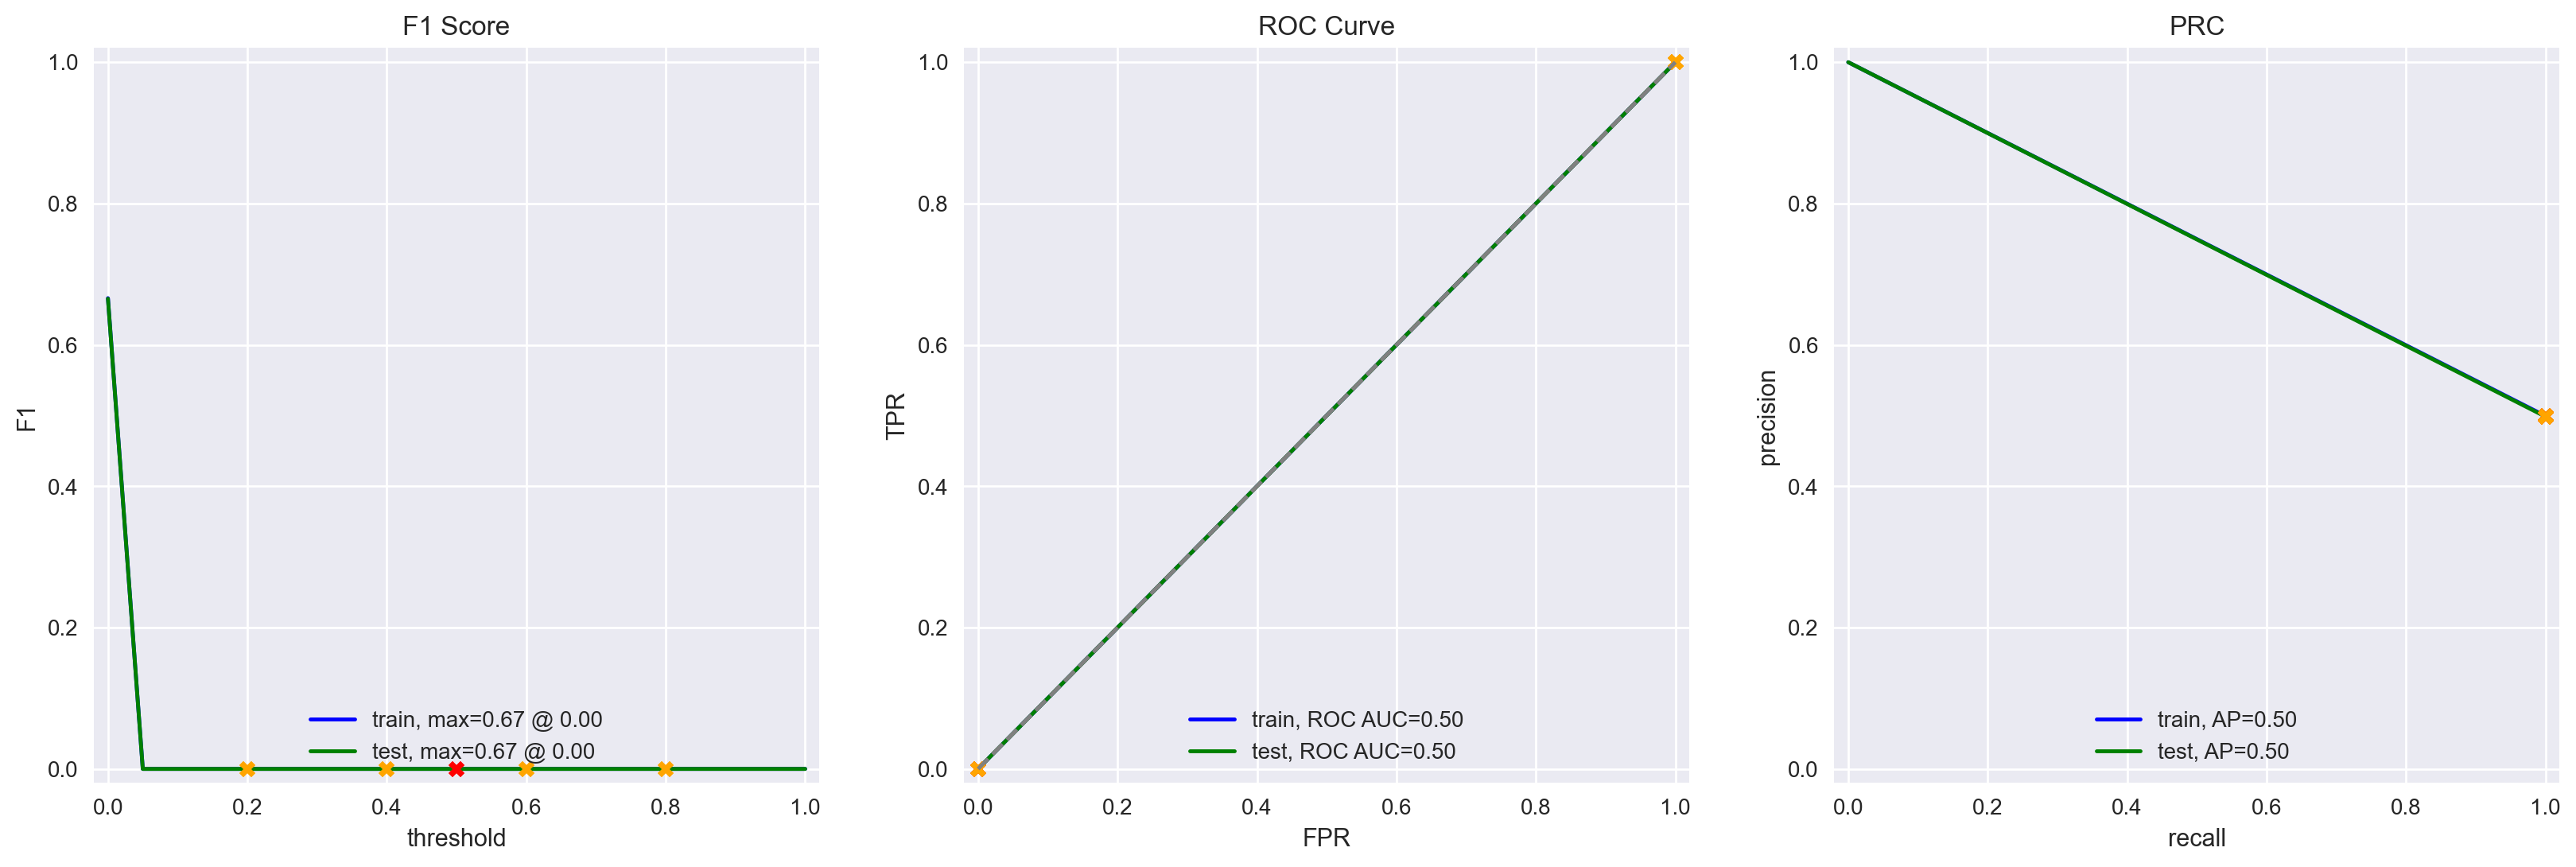

In [24]:
evaluate_model(dummy_model, 
               df_reviews_train['review_norm'], train_target, 
               df_reviews_test['review_norm'], test_target)

### Model 1 - NLTK, TF-IDF and LR

TF-IDF

In [25]:
# Download the set of stopwords from NLTK
nltk.download('stopwords')

# Load English stopwords and convert the set to a list
english_stopwords = list(stopwords.words('english'))

# Initialize a TfidfVectorizer with stopwords and fit it on the training data
tfidf_vectorizer = TfidfVectorizer(stop_words=english_stopwords)

# Fit and transform the training data to create TF-IDF features
train_features_1 = tfidf_vectorizer.fit_transform(df_reviews_train['review_norm'])

# Transform the test data to create TF-IDF features
test_features_1 = tfidf_vectorizer.transform(df_reviews_test['review_norm'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cosmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# Initialize a Logistic Regression model
model_1 = LogisticRegression(random_state=0)

# Train the model with the training data and the corresponding labels
model_1.fit(train_features_1, train_target)

LogisticRegression(random_state=0)

          train  test
Accuracy   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


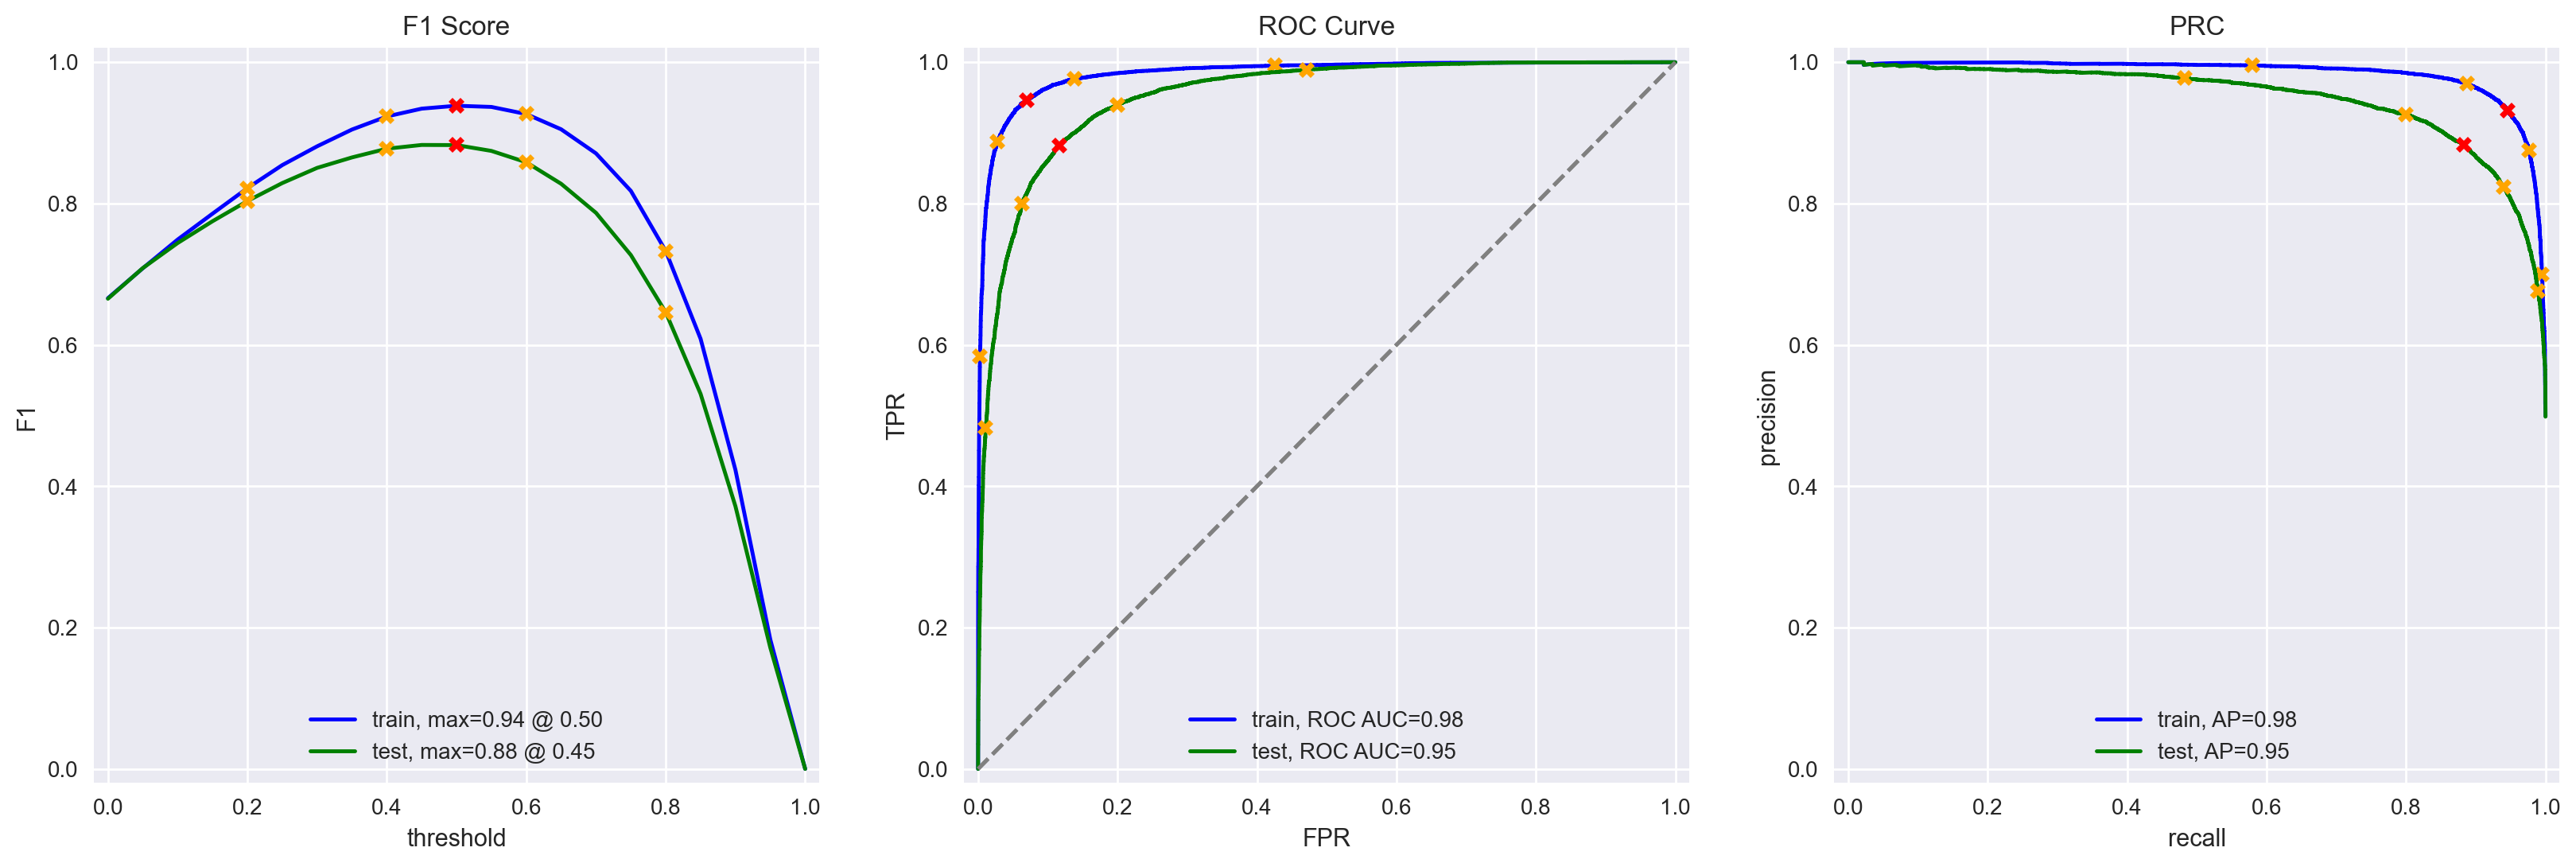

In [27]:
evaluate_model(model_1, train_features_1, train_target, test_features_1, test_target)

### Model 3 - spaCy, TF-IDF and LR

In [28]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [29]:
def text_preprocessing_3(text):
    
    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

In [30]:
# Apply the text preprocessing function to the 'review_norm' column of the training and test data
df_reviews_train['review_lemma'] = df_reviews_train['review_norm'].apply(text_preprocessing_3)
df_reviews_test['review_lemma'] = df_reviews_test['review_norm'].apply(text_preprocessing_3)

In [31]:
# Initialize a TfidfVectorizer without passing the stop words since we've already done preprocessing
tfidf_vectorizer_3 = TfidfVectorizer()

# Fit and transform the training data to create TF-IDF features
train_features_3 = tfidf_vectorizer_3.fit_transform(df_reviews_train['review_lemma'])

# Transform the test data to create TF-IDF features
test_features_3 = tfidf_vectorizer_3.transform(df_reviews_test['review_lemma'])

In [32]:
# Initialize the Logistic Regression model
model_3 = LogisticRegression()

# Fit the model to the training data
model_3.fit(train_features_3, train_target)

LogisticRegression()

          train  test
Accuracy   0.93  0.88
F1         0.93  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


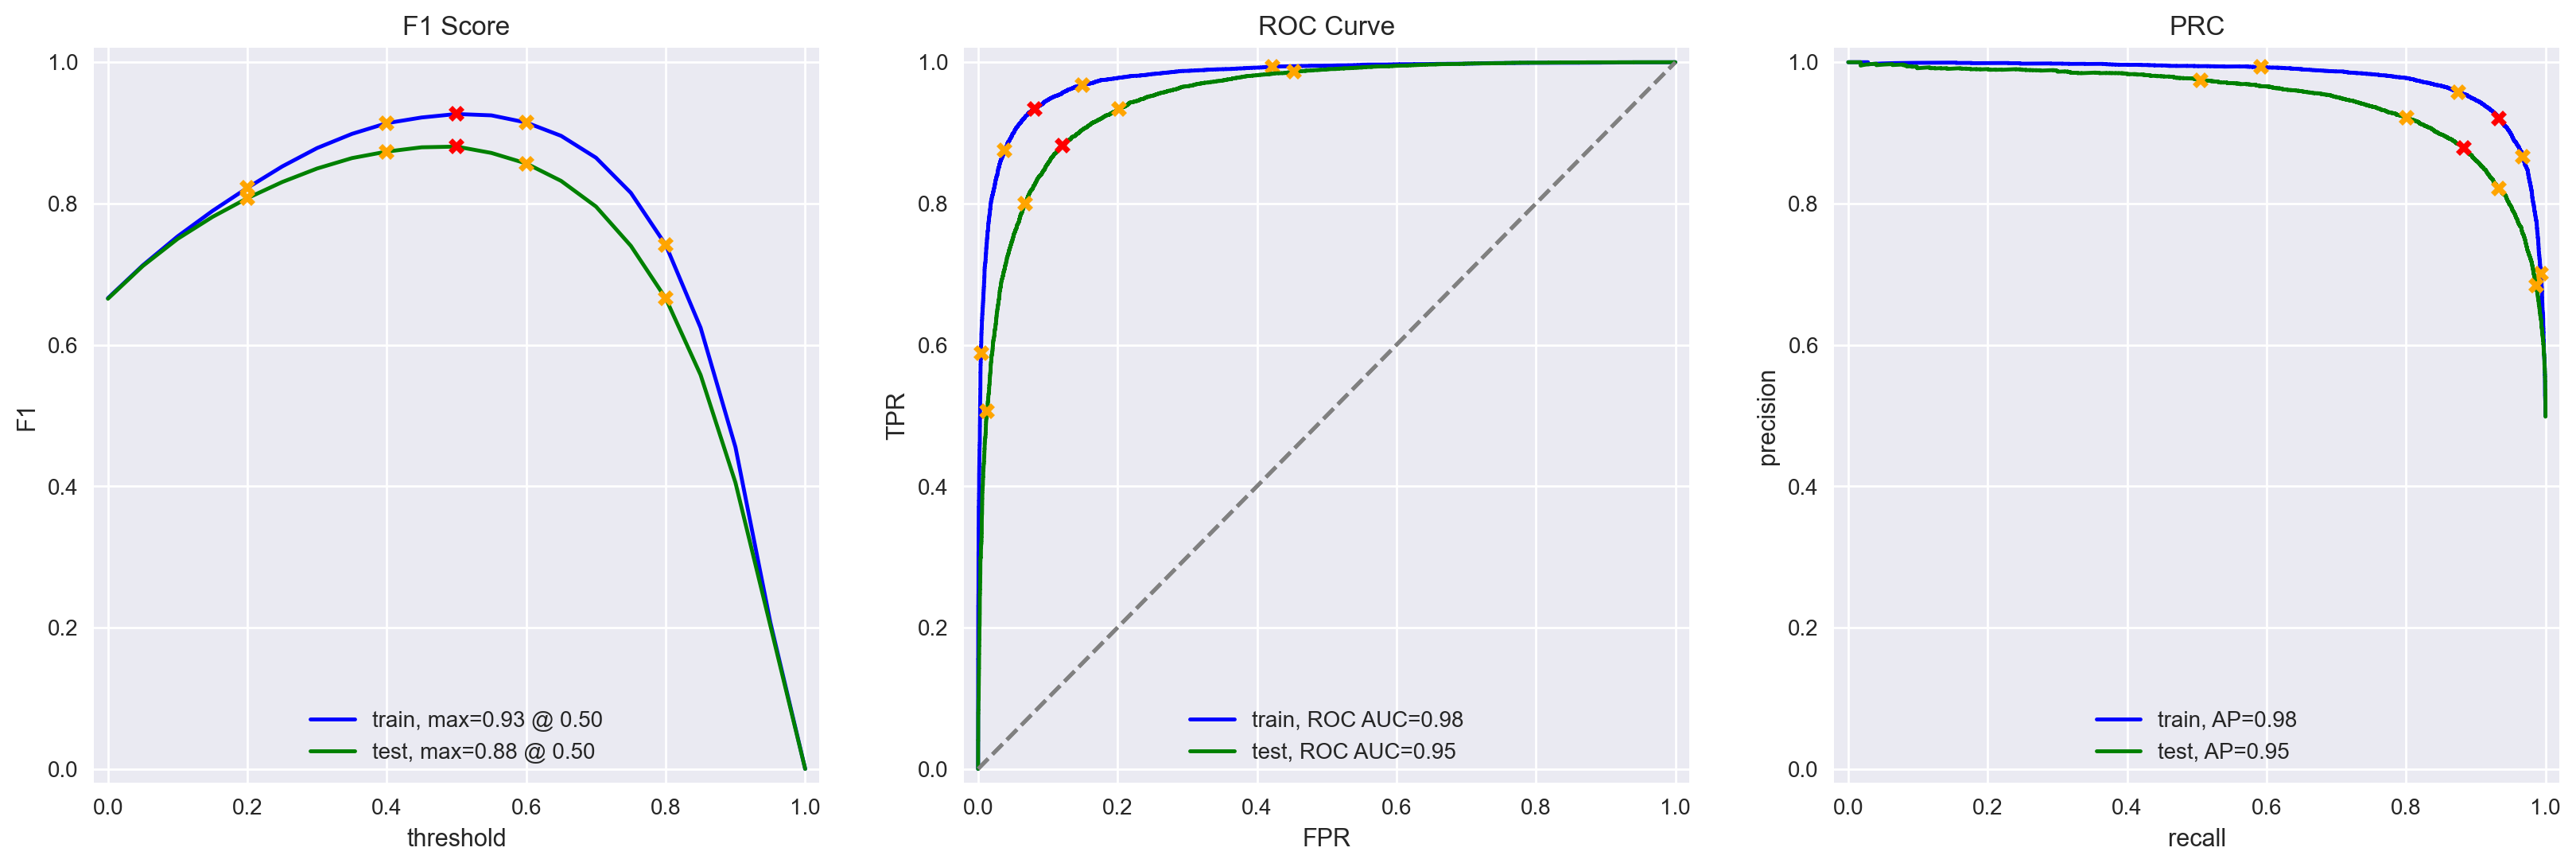

In [33]:
# Evaluate the model
evaluate_model(model_3, train_features_3, train_target, test_features_3, test_target)

### Model 4 - spaCy, TF-IDF and LGBMClassifier

[LightGBM] [Info] Number of positive: 11884, number of negative: 11912
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.311004 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 471910
[LightGBM] [Info] Number of data points in the train set: 23796, number of used features: 9456
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499412 -> initscore=-0.002353
[LightGBM] [Info] Start training from score -0.002353
          train  test
Accuracy   0.92  0.86
F1         0.92  0.86
APS        0.98  0.93
ROC AUC    0.98  0.94


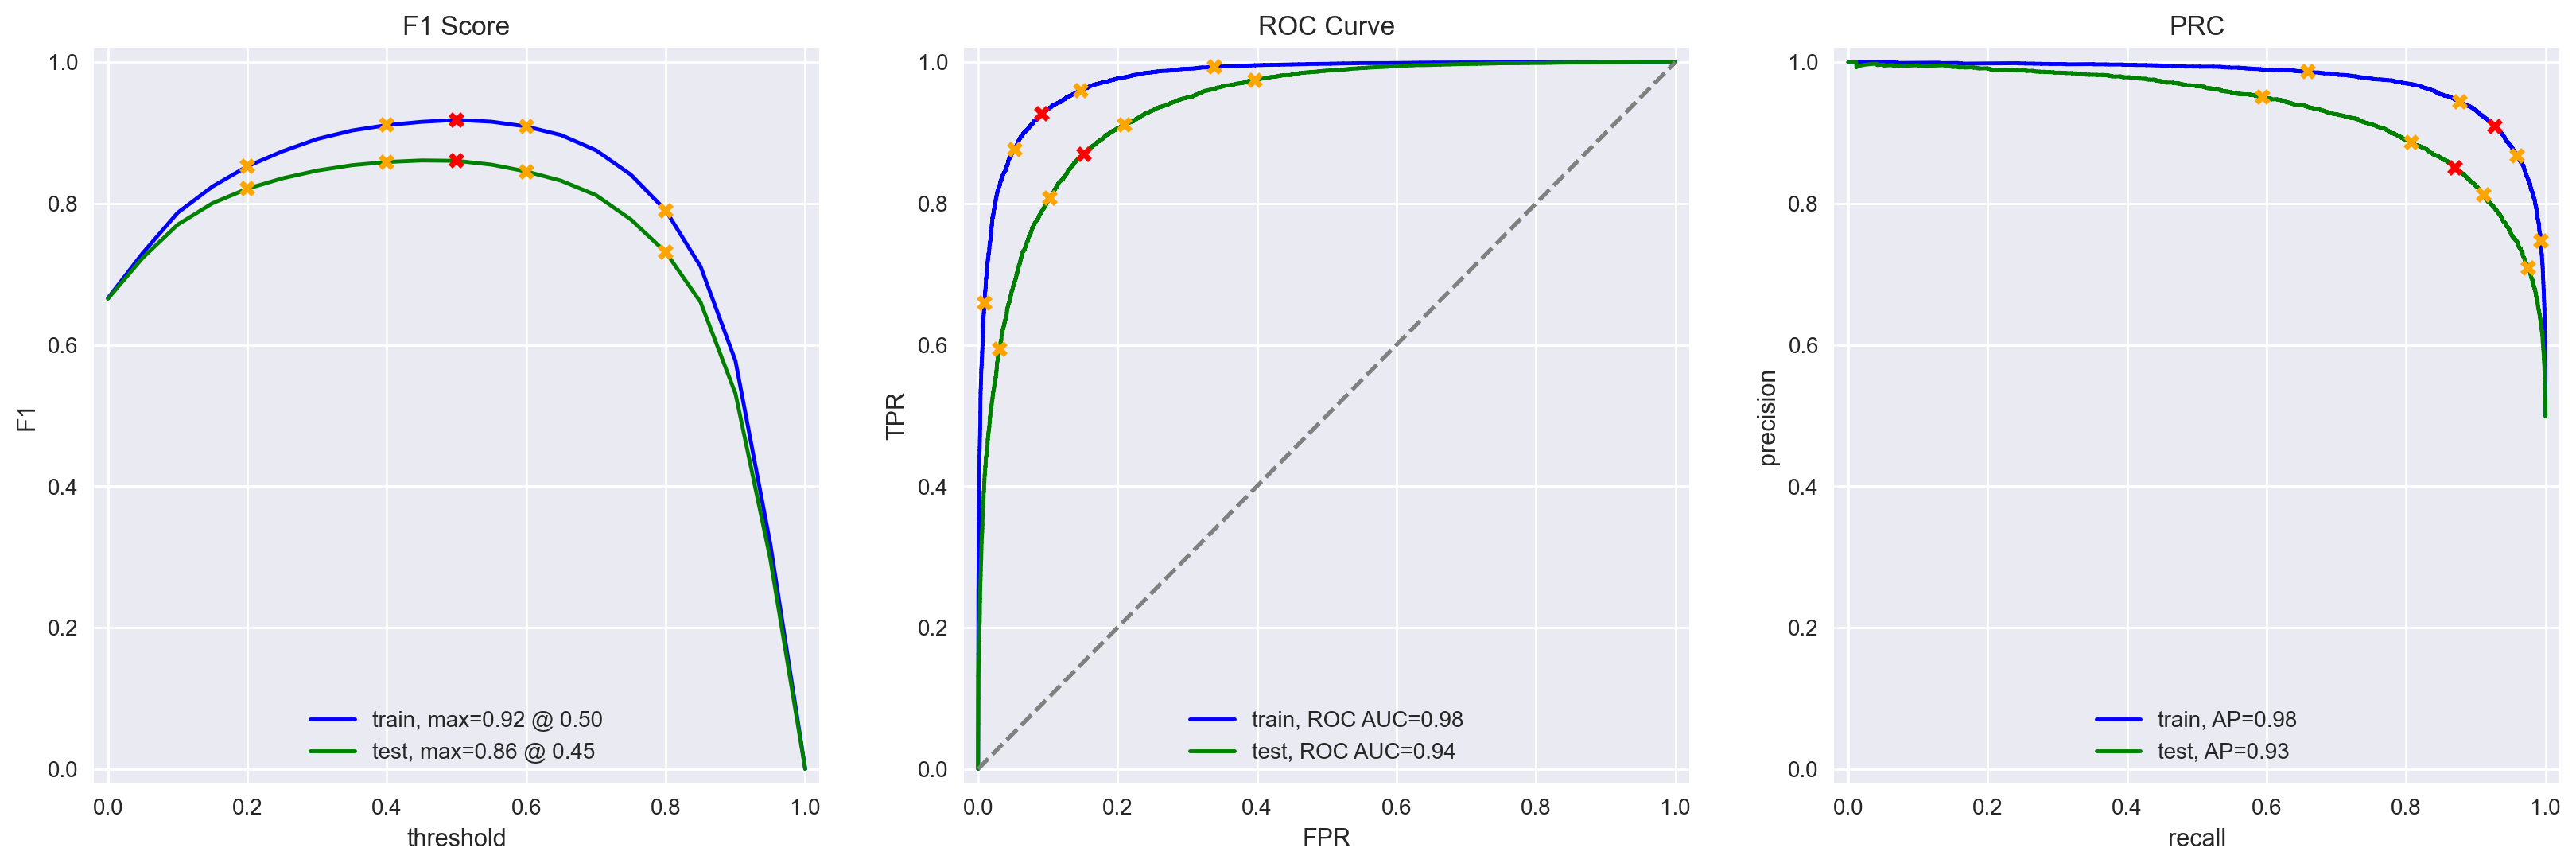

In [34]:
# Create and train an LGBMClassifier model
lgbm_model = LGBMClassifier(random_state=12345, n_jobs=-1)
lgbm_model.fit(train_features_3, train_target)

# Evaluate the model
evaluate_model(lgbm_model, train_features_3, train_target, test_features_3, test_target)

###  Model 9 - BERT

In [35]:
# Initialize the tokenizer and model configuration
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

In [36]:

def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
    # Convert texts to tokens, pad to max_length, and create attention masks
    ids_list = []
    attention_mask_list = []
    for text in texts:
        # Tokenize text and add special tokens ([CLS], [SEP])
        encoded_dict = tokenizer.encode_plus(
            text,                      # Input text
            add_special_tokens=True,   # Add '[CLS]' and '[SEP]'
            max_length=max_length,     # Pad & truncate all sentences
            pad_to_max_length=True,    # Pad all to max_length
            return_attention_mask=True,# Construct attention masks
            return_tensors='pt',       # Return PyTorch tensors
        )
        ids_list.append(encoded_dict['input_ids'])
        attention_mask_list.append(encoded_dict['attention_mask'])
    
    # Flatten the list of tensors to a single tensor
    ids_list = torch.cat(ids_list, dim=0)
    attention_mask_list = torch.cat(attention_mask_list, dim=0)
    
    # Set device based on availability and preference
    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    model.to(device)
    if not disable_progress_bar:
        print(f'Using the {device} device.')
    
    # Process embeddings in batches
    embeddings = []
    for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
        ids_batch = ids_list[batch_size*i:batch_size*(i+1)].to(device)
        attention_mask_batch = attention_mask_list[batch_size*i:batch_size*(i+1)].to(device)
        
        with torch.no_grad():
            model.eval()
            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)
        embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
    return np.concatenate(embeddings)

In [37]:
# Attention! Running BERT for thousands of texts may take long run on CPU, at least several hours
train_features_9 = BERT_text_to_embeddings(df_reviews_train['review_norm'], force_device='cuda')
test_features_9 = BERT_text_to_embeddings(df_reviews_test['review_norm'], force_device='cuda')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\Users\cosmi\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Using the cuda device.


100%|██████████| 238/238 [06:03<00:00,  1.53s/it]
c:\Users\cosmi\anaconda3\Lib\site-packages\transformers\tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Using the cuda device.


100%|██████████| 236/236 [06:00<00:00,  1.53s/it]


In [38]:
# Training a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(train_features_9, train_target)

test_predictions = logreg_model.predict(test_features_9)
print(classification_report(test_target, test_predictions))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86     11803
           1       0.87      0.85      0.86     11732

    accuracy                           0.86     23535
   macro avg       0.86      0.86      0.86     23535
weighted avg       0.86      0.86      0.86     23535



In [39]:
# Save the embeddings
np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# Load the embeddings
with np.load('features_9.npz') as data:
    train_features_9 = data['train_features_9']
    test_features_9 = data['test_features_9']

In [40]:
print(df_reviews_train['review_norm'].shape)
print(train_features_9.shape)
print(train_target.shape)

(23796,)
(23796, 768)
(23796,)


Based on the results
- The model exhibits strong and balanced performance across both classes, with high precision, recall, and F1-scores. This suggests it is equally good at identifying both positive and negative sentiments without significant bias toward either class.

- The balanced scores and high accuracy indicate that the BERT embeddings provide a robust feature set for sentiment analysis, enabling the Logistic Regression model to effectively capture and classify the sentiment expressed in the reviews.

- Given the complexity and variability of natural language, an accuracy of 0.86 is commendable, especially for a relatively simple model like Logistic Regression paired with powerful embeddings from BERT.

- The nearly equal number of instances in each class (support) helps ensure that the model's performance metrics are not skewed by class imbalance, making the high scores even more meaningful.


## My Reviews

In [41]:
# feel free to completely remove these reviews and try your models on your own reviews, those below are just examples

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

my_reviews['review_norm'] = my_reviews['review'].apply(normalize_text)

my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middle...
2,I was really fascinated with the movie,i was really fascinated with the movie
3,Even the actors looked really old and disinter...,even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...,i didnt expect the reboot to be so good writer...
5,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i ...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a single...
7,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i reall...


### Model 2

In [43]:
texts = my_reviews['review_norm']
texts_transformed = tfidf_vectorizer.transform(texts)
my_reviews_pred_prob = model_1.predict_proba(texts_transformed)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.16:  i did not simply like it not my kind of movie
0.18:  well i was bored and felt asleep in the middle of the movie
0.56:  i was really fascinated with the movie
0.13:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.26:  i didnt expect the reboot to be so good writers really cared about the source material
0.48:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.05:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.84:  launching on netflix was a brave move  i really appreciate being able to binge on episode after epis


### Model 3

In [44]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_3.predict_proba(tfidf_vectorizer_3.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.15:  i did not simply like it not my kind of movie
0.22:  well i was bored and felt asleep in the middle of the movie
0.50:  i was really fascinated with the movie
0.16:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.19:  i didnt expect the reboot to be so good writers really cared about the source material
0.69:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.04:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.87:  launching on netflix was a brave move  i really appreciate being able to binge on episode after epis


### Model 4

In [46]:
texts = my_reviews['review_norm']

tfidf_vectorizer_4 = tfidf_vectorizer_3
my_reviews_pred_prob = lgbm_model.predict_proba(tfidf_vectorizer_4.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.50:  i did not simply like it not my kind of movie
0.54:  well i was bored and felt asleep in the middle of the movie
0.62:  i was really fascinated with the movie
0.56:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.40:  i didnt expect the reboot to be so good writers really cared about the source material
0.74:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.19:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.72:  launching on netflix was a brave move  i really appreciate being able to binge on episode after epis


### Model 9

In [48]:
texts = my_reviews['review_norm']

my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

my_reviews_pred_prob = logreg_model.predict_proba(my_reviews_features_9)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.39:  i did not simply like it not my kind of movie
0.02:  well i was bored and felt asleep in the middle of the movie
0.99:  i was really fascinated with the movie
0.01:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.08:  i didnt expect the reboot to be so good writers really cared about the source material
0.99:  the movie had its upsides and downsides but i feel like overall its a decent flick i could see mysel
0.02:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.98:  launching on netflix was a brave move  i really appreciate being able to binge on episode after epis


The performance of the models on the provided reviews reveals distinct differences in how they assess sentiment, indicating variations in sensitivity, specificity, and possibly the underlying features they prioritize during prediction. Here's a brief analysis of each model's performance based on the predicted probabilities for the sentiment of each review:

Model 2: Linear SVM with TF-IDF
- Sensitivity: This model seems conservative in its predictions, mostly leaning towards neutral to negative sentiment (lower probabilities) across a range of reviews. It only shows high confidence in positive sentiment for the review about Netflix, indicating a possible preference for explicit positive indicators.
- Specificity: It is good at identifying clearly negative sentiments with low scores but struggles with nuanced positive expressions, as seen in the moderate scores for some positive reviews.

Model 3: Logistic Regression with TF-IDF
- Sensitivity: Similar to Model 2, this model is conservative but shows slightly higher probabilities on average for positive reviews. It's more confident in its assessment of the Netflix review and a decent flick, indicating it might be better at picking up nuanced positivity than Model 2.
- Specificity: It effectively identifies strongly negative sentiments but, like Model 2, may misinterpret nuanced or mixed sentiments.

Model 4: LightGBM with TF-IDF
- Sensitivity: This model has a broader range of predictions, indicating a different sensitivity to features within the text. It's more optimistic, assigning higher probabilities to positive sentiments but also showing higher probabilities for some negative reviews.
- Specificity: Its specificity seems compromised as it assigns moderate to high probabilities across the board, which could indicate a challenge in distinguishing between nuanced negative and positive sentiments.

Model 9: Logistic Regression with BERT Embeddings
- Sensitivity: This model shows a stark contrast in its predictions, with high probabilities for positive sentiments and very low for negative, indicating a strong differentiation between positive and negative sentiments based on BERT embeddings.
- Specificity: It excels in identifying both strongly positive and strongly negative sentiments, as indicated by the high contrast in its predictions. This suggests a high specificity, especially in recognizing clear sentiment expressions.

Performance Summary
- Handling Nuanced Sentiments: Model 9 (BERT Embeddings) stands out for its ability to differentiate between positive and negative sentiments clearly, likely due to the rich contextual information captured by BERT embeddings. Models 2 and 3 are more conservative, possibly due to limitations in capturing nuanced sentiments with TF-IDF features. Model 4 shows a varied approach but may struggle with specificity.
- Sensitivity and Specificity: Model 9 demonstrates high sensitivity and specificity, particularly in distinguishing positive sentiments. Models 2 and 3 are more conservative, possibly erring on the side of caution and thus potentially missing nuanced sentiments. Model 4’s broader prediction range suggests a different interpretation of features but may need refinement to improve specificity.
- Overall Effectiveness: Based on the provided predictions, Model 9 appears to be the most effective in capturing a wide range of sentiments, from strongly negative to strongly positive, indicating the power of BERT embeddings in sentiment analysis tasks. The other models, while having their strengths, show varying degrees of effectiveness, with potential areas for improvement in handling nuanced or mixed sentiments.

These observations suggest that the choice of model and features (TF-IDF vs. BERT embeddings) significantly impacts sentiment analysis performance, especially in handling nuanced expressions of sentiment.

## Conclusions

Key Findings:
- Model Performance Variability: There was a noticeable variance in the performance of models, influenced by the type of feature extraction (TF-IDF vs. BERT embeddings) and the algorithm used. This variance underscores the importance of choosing the right combination of feature representation and machine learning technique based on the specific requirements of the sentiment analysis task.

- Effectiveness of BERT Embeddings: The model utilizing BERT embeddings demonstrated superior performance in distinguishing between sentiments with greater accuracy. This model showed a remarkable ability to capture nuanced expressions of sentiment, likely due to BERT's deep contextual understanding of language, which surpasses the capabilities of traditional vectorization methods like TF-IDF.

- Challenges with Traditional Models: Traditional models using TF-IDF vectorization showed a more conservative approach to sentiment prediction, often leaning towards neutral or less definitive sentiment classifications. While effective in certain contexts, these models may struggle with the complexity and subtlety of human language, especially when dealing with nuanced or mixed sentiments.

The exploration of different models for sentiment analysis has highlighted the critical role of feature representation and model choice in effectively interpreting sentiments in text. The superior performance of the BERT-based model underscores the advancements in NLP technology, offering deeper insights into sentiment analysis tasks. However, the variability in model performance also suggests that there is no one-size-fits-all solution; the choice of model should be tailored to the specific nuances of the dataset and the objectives of the sentiment analysis. Moving forward, leveraging advanced NLP techniques and exploring innovative modeling approaches will be key to enhancing the accuracy and applicability of sentiment analysis in various domains.